# Classication
Diberikan sebuah data milik suatu bank yang berisikan kampanye pemasaran. Data tersebut berisikan kampanye langsung melalui sambungan telepon kepada nasabah bank. Melalui data tersebut akan dilakukan prediksi apakah seseorang akan melakukan Deposit ke dalam bank.

Data terdiri dari 11162 baris dengan 17 kolom atribut. Berikut adalah atribut-atribut yang terdapat pada dataset:

1. age: usia calon nasabah 
2. job: pekerjaan calon nasabah 
3. marital: status pernikahan nasabah (married, single, divorce)
4. education: tingkat pendidikan nasabah (secondary, primary, tertiary,unknown)
5. default: apakah memiliki kredit secara default atau tidak? (yes, no)
6. balance: jumlah saldo 
7. housing: apakah memiliki cicilan rumah atau tidak? (yes, no)
8. loan: apakah memiliki pinjaman pribadi atau tidak? (yes, no)
9. contact: tipe kontak komunikasi yang digunakan (telephone, cellular, unknown)
10. day: terakhir dihubungi pada hari ke berapa
11. month: terakhir dihubungi pada bulan apa dalam satu tahun (januari - desember)
12. duration: lama durasi dihubungi dalam detik
13. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk nasabah ini
14. pdays: jumlah hari yang berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya
15. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk nasabah ini
16. poutcome: hasil dari kampanye pemasaran sebelumnya
17. deposit: apakah nasabah melakukan melakukan deposit? (yes, no)



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GigasTaufan/Bank-marketing-classification/master/data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# melihat informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Terdapat 2 tipe data yakni data bertipe objek dan numerik
- Bertipe numerik: age, balance, day, duration, campaign, pdays, previous
- Bertipe objek: job, marital, education, default, housing, loan, contact, month, poutcome, deposit

In [4]:
# mengecek apakah ada data kosong
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Tidak terdapat data kosong

In [5]:
# mengecek apakah ada duplikasi data
df.duplicated().sum()

0

Tidak ada duplikasi data

### Hubungan Atribut dengan Kelas

no     5873
yes    5289
Name: deposit, dtype: int64




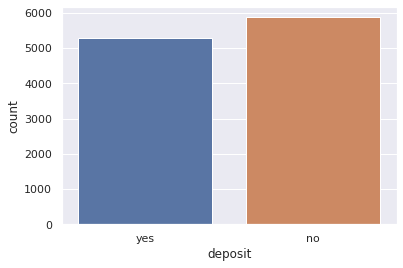

In [6]:
# melihat atribut deposit dan perbandingan jumlah valuenya
print(df['deposit'].value_counts())
print('\n')
sns.countplot(x='deposit', data=df)

Grafik tersebut merupakan perbandingan kelas dari seluruh data. Kelas dibagi menjadi dua yakni yes dan no.
- yes: Untuk nasabah yang melakukan deposit
- no: Untuk nasabah yang tidak melakukan deposit

#### Data Tipe Kategorikal

##### Jobs - Deposit

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64




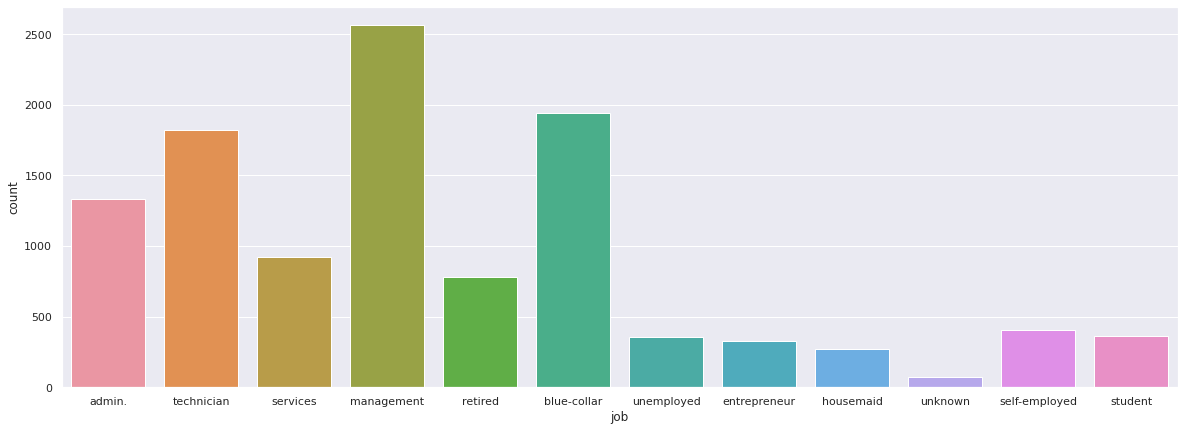

In [7]:
# melihat atribut job dan perbandingan jumlah valuenya
print(df['job'].value_counts())
print('\n')
plt.figure(figsize=(20, 7))
sns.countplot(x='job', data=df)

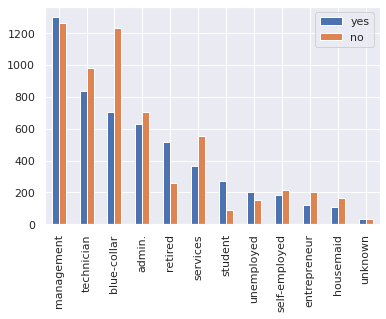

In [8]:
job_df = pd.DataFrame()
job_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
job_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()
job_df.plot.bar()

Dari data bidang pekerjaan yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Nasabah yang berprofesi management jumlah nasabah yang melakukan deposit paling tinggi di antara profesi lainnya, namun juga paling tinggi tidak melakukan deposit. 
- Nasabah yang berprofesi blue-colar, jumlah nasabah yang tidak melakukan deposit jauh lebih banyak darioada yang melakukan deposit. Dapat diasumsikan jika nasabah yang berprofesi blue-collar memiliki kecenderungan untuk tidak melakukan deposit atas kampanye marketing yang diadakan.
- Nasabah yang berprofesi retired, jumlah nasabah yang melakukan deposit lebih banyak daripada nasabah yang tidak melakukan deposit. Dapat diasumsikan jika nasabah yang berprofesi retired memiliki kecenderungan untuk akan melakukan deposit atas kampanye marketing yang diadakan.

##### Marital - Deposit

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64




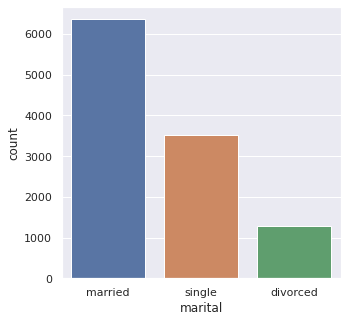

In [9]:
# melihat atribut marital dan perbandingan jumlah valuenya
print(df['marital'].value_counts())
print('\n')
plt.figure(figsize=(5, 5))
sns.countplot(x='marital', data=df)

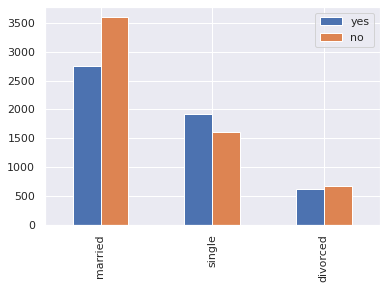

In [10]:
marital_df = pd.DataFrame()
marital_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
marital_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()
marital_df.plot.bar()

Dari data status pernikahan yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Nasabah yang memiliki status menikah jumlah tidak melakukan deposit lebih tinggi dibanding yang melakukan. Dapat diasumsikan jika nasabah yang status pernikahannya married memiliki kecenderungan untuk tidak melakukan deposit atas kampanye marketing yang diadakan.

##### Education - Deposit

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64




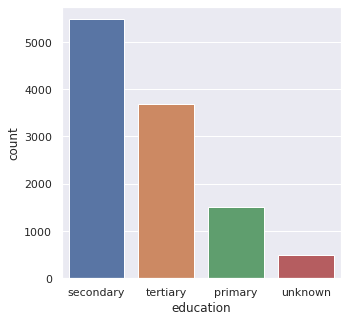

In [11]:
# melihat atribut education dan perbandingan jumlah valuenya
print(df['education'].value_counts())
print('\n')
plt.figure(figsize=(5, 5))
sns.countplot(x='education', data=df)

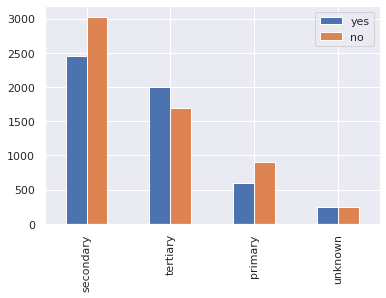

In [12]:
education_df = pd.DataFrame()
education_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
education_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()
education_df.plot.bar()

Dari data tingkat pendidikan yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Selisih untuk yang melakukan dan tidak melakukan deposit pada setiap tingkat pendidikan tidak terlalu besar.
- Nasabah yang memiliki tingkat pendidikan secondary dan primary jumlah tidak melakukan deposit lebih tinggi daripada yang melakukan. 
- Nasabah yang memiliki tingkat pendidikan pendidikan tertiary jumlah yang melakukan deposit lebih tinggi daripada yang melakukan. 


##### Default-Deposit

no     10994
yes      168
Name: default, dtype: int64




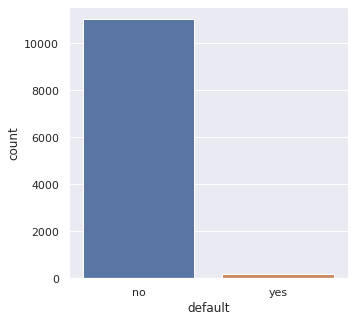

In [13]:
# melihat atribut default dan perbandingan jumlah valuenya
print(df['default'].value_counts())
print('\n')
plt.figure(figsize=(5, 5))
sns.countplot(x='default', data=df)

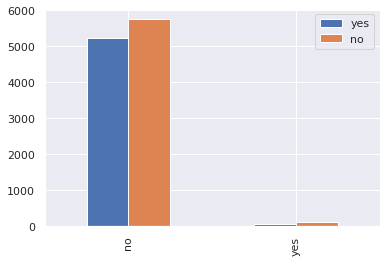

In [14]:
default_df = pd.DataFrame()
default_df['yes'] = df[df['deposit'] == 'yes']['default'].value_counts()
default_df['no'] = df[df['deposit'] == 'no']['default'].value_counts()
default_df.plot.bar()

Dari data atribut default yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Nasabah yang tidak memiliki kredit secara default memiliki jumlah lebih tinggi daripada yang memiliki kredit secara default. Selisih antara nasabah yang melakukan deposit dan tidak melakukan deposit juga tidak terlalu tinggi. Dengan yang tidak melakukan deposit lebih banyak daripada yang melakukan deposit.

##### Housing-Deposit

no     5881
yes    5281
Name: housing, dtype: int64




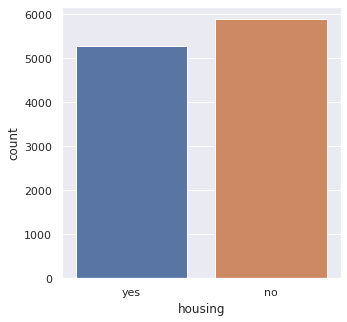

In [15]:
# melihat atribut housing dan perbandingan jumlah valuenya
print(df['housing'].value_counts())
print('\n')
plt.figure(figsize=(5, 5))
sns.countplot(x='housing', data=df)

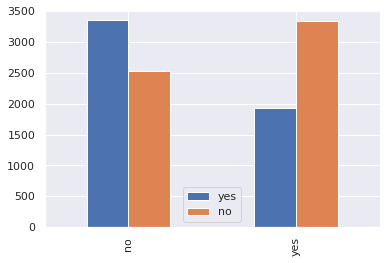

In [16]:
housing_df = pd.DataFrame()
housing_df['yes'] = df[df['deposit'] == 'yes']['housing'].value_counts()
housing_df['no'] = df[df['deposit'] == 'no']['housing'].value_counts()
housing_df.plot.bar()

Dari data atribut housing yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Nasabah yang tidak memiliki cicilan rumah lebih banyak yang melakukan deposit
- Nasabah yang memiliki cicilan rumah lebih banyak yang tidak melakukan deposit

##### Loan-Deposit

no     9702
yes    1460
Name: loan, dtype: int64




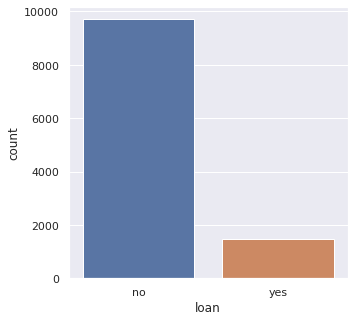

In [17]:
# melihat atribut loan dan perbandingan jumlah valuenya
print(df['loan'].value_counts())
print('\n')
plt.figure(figsize=(5, 5))
sns.countplot(x='loan', data=df)

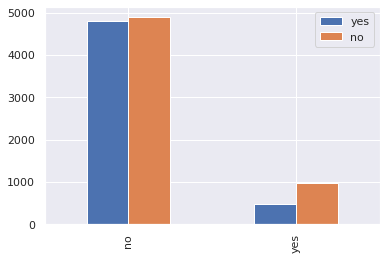

In [18]:
loan_df = pd.DataFrame()
loan_df['yes'] = df[df['deposit'] == 'yes']['loan'].value_counts()
loan_df['no'] = df[df['deposit'] == 'no']['loan'].value_counts()
loan_df.plot.bar()

Dari data atribut loan yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Nasabah yang tidak mempunyai pinjaman pribadi jumlahnya lebih tinggi daripada yang memiliki pinjaman pribadi. Selisih antara nasabah yang melakukan deposit dan tidak melakukan deposit juga tidak terlalu tinggi. Dengan yang tidak melakukan deposit lebih banyak daripada yang melakukan deposit, walau tipis selisihnya.

##### Contact-Deposit

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64




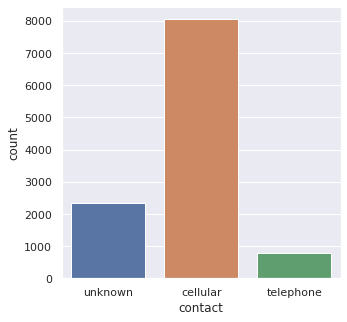

In [19]:
# melihat atribut contact dan perbandingan jumlah valuenya
print(df['contact'].value_counts())
print('\n')
plt.figure(figsize=(5, 5))
sns.countplot(x='contact', data=df)

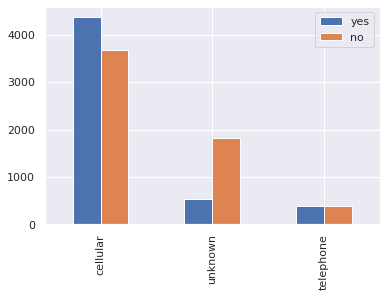

In [20]:
contact_df = pd.DataFrame()
contact_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
contact_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()
contact_df.plot.bar()

Dari data atribut contact yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:

- Nasabah yang dihubungi melalui seluler jauh lebih banyak daripada yang melalui telepon biasa.
- Nasabah yang tidak diketahui cara dihubunginya melalui jalur apa, jumlah yang tidak melakukan deposit lebih banyak daripada yang melakukan dengan selisih yang cukup banyak. Dapat diasumsikan jika nasabah yang tidak diketahui cara dihubunginya ini akan tidak melakukan deposit

##### Month-Deposit

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64




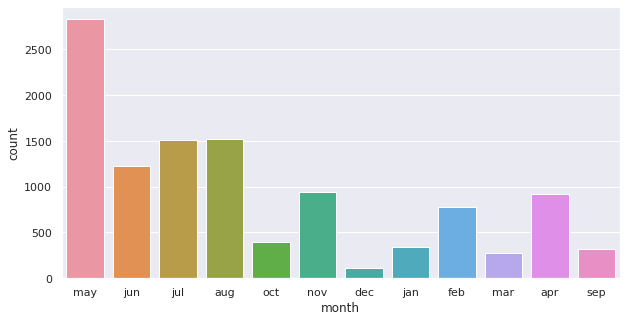

In [21]:
# melihat atribut month dan perbandingan jumlah valuenya
print(df['month'].value_counts())
print('\n')
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df)

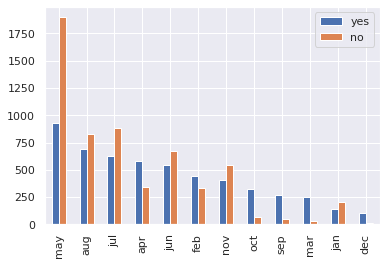

In [22]:
month_df = pd.DataFrame()
month_df['yes'] = df[df['deposit'] == 'yes']['month'].value_counts()
month_df['no'] = df[df['deposit'] == 'no']['month'].value_counts()
month_df.plot.bar()

Dari data atribut month yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:

- Nasabah paling banyak dihubungi pada Mei. Nasabah juga paling banyak tidak melakukan deposit pada bulan Mei. 
- Pada bulan Mei, Agustus, Juli, Juni, November, dan Januari, nasabah lebih banyak yang tidak melakukan deposit
- Pada bulan April, Februaru, Oktober, September, Maret, dan Desember. 

##### Poutcome-Deposit

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64




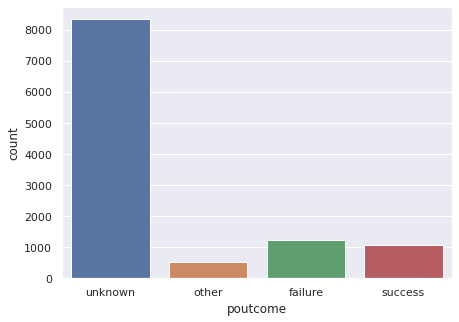

In [23]:
# melihat atribut poutcome dan perbandingan jumlah valuenya
print(df['poutcome'].value_counts())
print('\n')
plt.figure(figsize=(7, 5))
sns.countplot(x='poutcome', data=df)

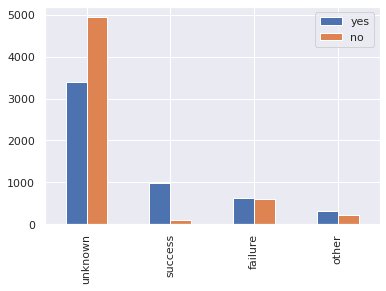

In [24]:
poutcome_df = pd.DataFrame()
poutcome_df['yes'] = df[df['deposit'] == 'yes']['poutcome'].value_counts()
poutcome_df['no'] = df[df['deposit'] == 'no']['poutcome'].value_counts()
poutcome_df.plot.bar()

Dari data atribut poutcome yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Nasabah yang tidak diketahui hasil dari kampanye sebelumnya (unknown) memiliki jumlah paling banyak. Dapat diasumsikan bahwa mayoritas data merupakan nasabah yang baru pertama kali dihubungi atas suatu kampanye dari bank.
- Nasabah yang berada pada kategori unknown memiliki jumlah yang tidak melakukan deposit lebih banyak daripada yang melakukan deposit, dengan selisih yang banyak.
- Nasabah yang pada kampanye sebelumnya sukses (success) memiliki jumlah yang melakukan deposit lebih banyak daripada yang tidak. Selisihnya juga cukup banyak dan dapat diasumsikan jika pada kampanye sebelumnya dia menerima penawaran maka pada kampanye selanjutnya akan menerima penawaran tersebut. 

#### Data Tipe Numerik

In [25]:
# melihat statistik dari data tipe numerik
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Berdasarkan deskripsi data yang ditampilkan di atas, atribut pdyas memiliki nilai minimal quartil bawah dan median = -1. Atribut pdays seharusnya tidak memiliki nilai -1 karena berisikan jumlah hari. Bisa dianggap ada bahwa nilai -1 merupakan noise.

In [26]:
# jumlah data yang memiliki nilai pdays = -1
df[df['pdays']==-1]['pdays'].count()

8324

Jumlah tersebut sama dengan 74% dari total data. Atribut pdays dapat dihapus karena noise yang terlalu besar

##### Age-Deposit

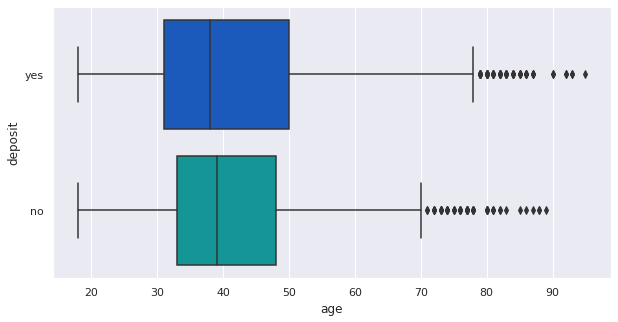

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='age',y='deposit',data=df,palette='winter', orient='h')

In [28]:
age_df = pd.DataFrame()
age_df['yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
age_df['no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']
age_df

,yes,no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


Dari data atribut age yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Rata-rata usia dari nasabah yang dihubungi baik yang melakukan deposit ataupun yang tidak hampir sama di 40 tahunan. Usia termuda yang melakukan deposit sama-sama 18 tahun, dan untuk nasabah yang melakukan deposit tertua berusia 95 tahun, sedangkan yang tidak melakukan deposit tertua berusia 89 tahun.

##### Balance-Deposit

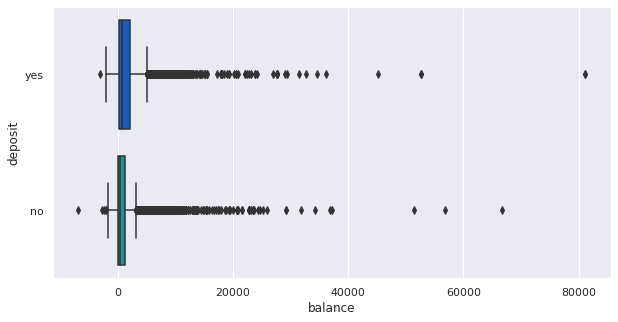

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='balance',y='deposit',data=df,palette='winter', orient='h')

In [30]:
balance_df = pd.DataFrame()
balance_df['yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
balance_df['no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']
balance_df

,yes,no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


Dari data atribut balance yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Terdapat nasabah yang memiliki balance atau jumlah saldo bernilai negatif, baik untuk yang tidak melakukan deposit ataupun yang melakukan. Dengan masing-masing bernilai -3058 untuk data nasabah yang melakukan deposit dan -6847 untuk yang tidak melakukan deposit.
- Rata-rata jumlah saldo untuk nasabah yang masuk dalam kategori melakukan deposit lebih besar daripada yang tidak melakukan yakni sebesar 1804.2679.
- Rata-rata jumlah saldo untuk nasabah yang masuk dalam kategori tidak melakukan deposit adalah sebesar 1280.2271.

##### Day-Deposit

Yes:  5289
No:  5289




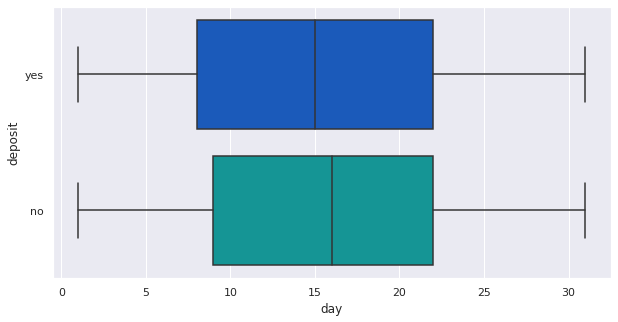

In [31]:
plt.figure(figsize=(10, 5))
print('Yes: ', df[df['deposit'] == 'yes']['day'].count())
print('No: ', df[df['deposit'] == 'yes']['day'].count())
print('\n')
sns.boxplot(x='day',y='deposit',data=df,palette='winter', orient='h')

In [32]:
day_df = pd.DataFrame()
day_df['yes'] = (df[df['deposit'] == 'yes'][['deposit','day']].describe())['day']
day_df['no'] = (df[df['deposit'] == 'no'][['deposit','day']].describe())['day']
day_df

,yes,no
count,5289.000000,5873.000000
mean,15.158253,16.108122
std,8.501875,8.322071
min,1.000000,1.000000
25%,8.000000,9.000000
50%,15.000000,16.000000
75%,22.000000,22.000000
max,31.000000,31.000000


Dari data atribut day yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Baik untuk golongan nasabah yang melakukan deposit dan tidak hampir sama datanya

##### Duration-Deposit

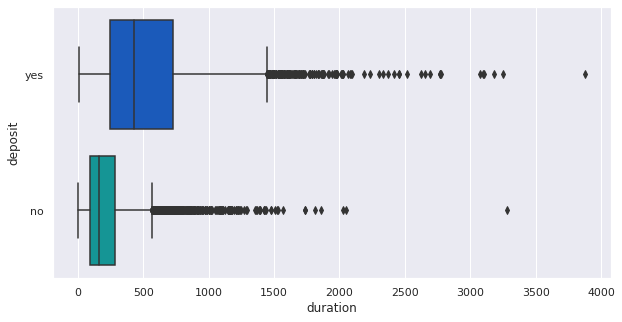

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='duration',y='deposit',data=df,palette='winter', orient='h')

In [34]:
duration_df = pd.DataFrame()
duration_df['yes'] = (df[df['deposit'] == 'yes'][['deposit','duration']].describe())['duration']
duration_df['no'] = (df[df['deposit'] == 'no'][['deposit','duration']].describe())['duration']
duration_df

,yes,no
count,5289.000000,5873.000000
mean,537.294574,223.130257
std,392.525262,208.577530
min,8.000000,2.000000
25%,244.000000,94.000000
50%,426.000000,163.000000
75%,725.000000,282.000000
max,3881.000000,3284.000000


Dari data atribut duration yang ditampilkan dapat dilihat beberapa informasi sebagai berikut:
- Rata-rata nasabah yang memiliki durasi lebih lama ketika dihubungi lebih banyak melakukan deposit daripada yang dihubungi tidak terlalu lama. 

##### Campaign-Deposit

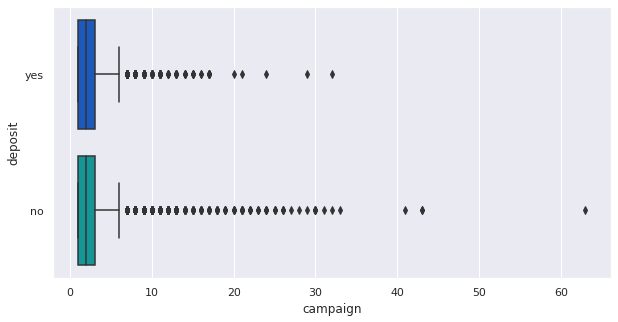

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='campaign',y='deposit',data=df,palette='winter', orient='h')

In [36]:
campaign_df = pd.DataFrame()
campaign_df['yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
campaign_df['no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']
campaign_df

,yes,no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


##### Previous-Deposit

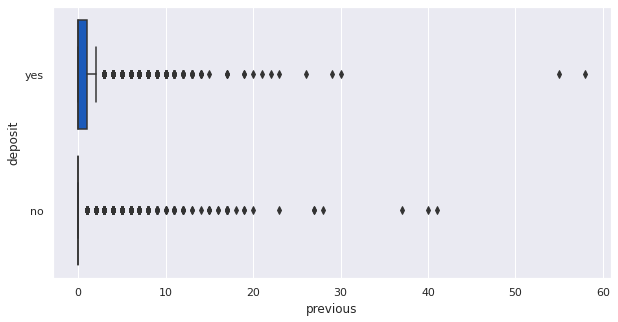

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='previous',y='deposit',data=df,palette='winter', orient='h')

In [38]:
previous_df = pd.DataFrame()
previous_df['yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
previous_df['no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']
previous_df

,yes,no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


## Data Preparation

###### 1. Drop atribut pdays
Berdasarkan analisis sebelumnya atribut pdays dapat di hapus

In [39]:
df.drop('pdays', axis=1, inplace=True)

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,yes


###### 2. Encode Categorical Data
Atribut kategorikal yang memiliki nilai binary (no atau yes) akan diubah menjadi bentuk 0 dan 1, di mana **no = 0** dan **yes = 1**. Atribut-atribut tersebut adalah default, Housing, Loan, dan Deposit

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [42]:
df_encoded=df.copy()

In [43]:
# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_encoded[['default', 'housing', 'loan']]))
df_encoded.columns = encoder.get_feature_names(['default', 'housing', 'loan'])

In [44]:
df.drop(['default', 'housing', 'loan'] ,axis=1, inplace=True)
df_encoded= pd.concat([df, df_encoded], axis=1)

In [45]:
deposit = pd.get_dummies(df_encoded['deposit'], drop_first=True)
df_encoded.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,deposit,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,59,admin.,married,secondary,2343,unknown,5,may,1042,1,0,unknown,yes,1.0,0.0,0.0,1.0,1.0,0.0
1,56,admin.,married,secondary,45,unknown,5,may,1467,1,0,unknown,yes,1.0,0.0,1.0,0.0,1.0,0.0
2,41,technician,married,secondary,1270,unknown,5,may,1389,1,0,unknown,yes,1.0,0.0,0.0,1.0,1.0,0.0
3,55,services,married,secondary,2476,unknown,5,may,579,1,0,unknown,yes,1.0,0.0,0.0,1.0,1.0,0.0
4,54,admin.,married,tertiary,184,unknown,5,may,673,2,0,unknown,yes,1.0,0.0,1.0,0.0,1.0,0.0


In [46]:
df_encoded.drop(['deposit'],axis=1,inplace=True)
df_encoded = pd.concat([df_encoded, deposit],axis=1)
df_encoded.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,yes
0,59,admin.,married,secondary,2343,unknown,5,may,1042,1,0,unknown,1.0,0.0,0.0,1.0,1.0,0.0,1
1,56,admin.,married,secondary,45,unknown,5,may,1467,1,0,unknown,1.0,0.0,1.0,0.0,1.0,0.0,1
2,41,technician,married,secondary,1270,unknown,5,may,1389,1,0,unknown,1.0,0.0,0.0,1.0,1.0,0.0,1
3,55,services,married,secondary,2476,unknown,5,may,579,1,0,unknown,1.0,0.0,0.0,1.0,1.0,0.0,1
4,54,admin.,married,tertiary,184,unknown,5,may,673,2,0,unknown,1.0,0.0,1.0,0.0,1.0,0.0,1


Atribut kategorikal yang bukan binary juga perlu untuk dipreprocess.


Pada atribut seperti job, education, contact, dan poutcome terdapat nilai unknown. Untuk setiap atribut akan diubah sesuai dengan atribut masing-masing. unknown pada atribut job akan diubah nilainya menjadi unknown_job, begitu juga dengan yang lainnya.

In [47]:
df_encoded['job'] = df_encoded['job'].replace(['unknown'],'unknown_job')
df_encoded['education'] = df_encoded['education'].replace(['unknown'],'unknown_education')
df_encoded['contact'] = df_encoded['contact'].replace(['unknown'],'unknown_contact')
df_encoded['poutcome'] = df_encoded['poutcome'].replace(['unknown'],'unknown_poutcome')

In [48]:
job = pd.get_dummies(df_encoded['job'])
marital = pd.get_dummies(df_encoded['marital'])
education = pd.get_dummies(df_encoded['education'])
contact = pd.get_dummies(df_encoded['contact'])
month = pd.get_dummies(df_encoded['month'])
poutcome = pd.get_dummies(df_encoded['poutcome'])

In [49]:
df_encoded.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'],axis=1,inplace=True)
df_encoded.head()

,age,balance,day,duration,campaign,previous,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,yes
0,59,2343,5,1042,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1
1,56,45,5,1467,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1
2,41,1270,5,1389,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1
3,55,2476,5,579,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,54,184,5,673,2,0,1.0,0.0,1.0,0.0,1.0,0.0,1


In [50]:
df_encoded = pd.concat([df_encoded, job, marital, education, contact, month, poutcome],axis=1)

In [51]:
df_encoded.head()

,age,balance,day,duration,campaign,previous,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,yes,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_job,divorced,married,single,primary,secondary,tertiary,unknown_education,cellular,telephone,unknown_contact,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,other,success,unknown_poutcome
0,59,2343,5,1042,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Set Feature & Target
X = atribut-atribut selain deposit

Y = atribut deposit

In [52]:
X = df_encoded.drop(['yes'],axis=1)
y = df_encoded['yes']

In [53]:
X.head()

,age,balance,day,duration,campaign,previous,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_job,divorced,married,single,primary,secondary,tertiary,unknown_education,cellular,telephone,unknown_contact,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,other,success,unknown_poutcome
0,59,2343,5,1042,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: yes, dtype: uint8

## Set Training and Testing Data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X , y, shuffle = True, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 50)
(3349, 50)
(7813,)
(3349,)


## Machine Learning

### Decision Tree

In [56]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
# dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

In [57]:
X_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown_job', 'divorced', 'married',
       'single', 'primary', 'secondary', 'tertiary', 'unknown_education',
       'cellular', 'telephone', 'unknown_contact', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure',
       'other', 'success', 'unknown_poutcome'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


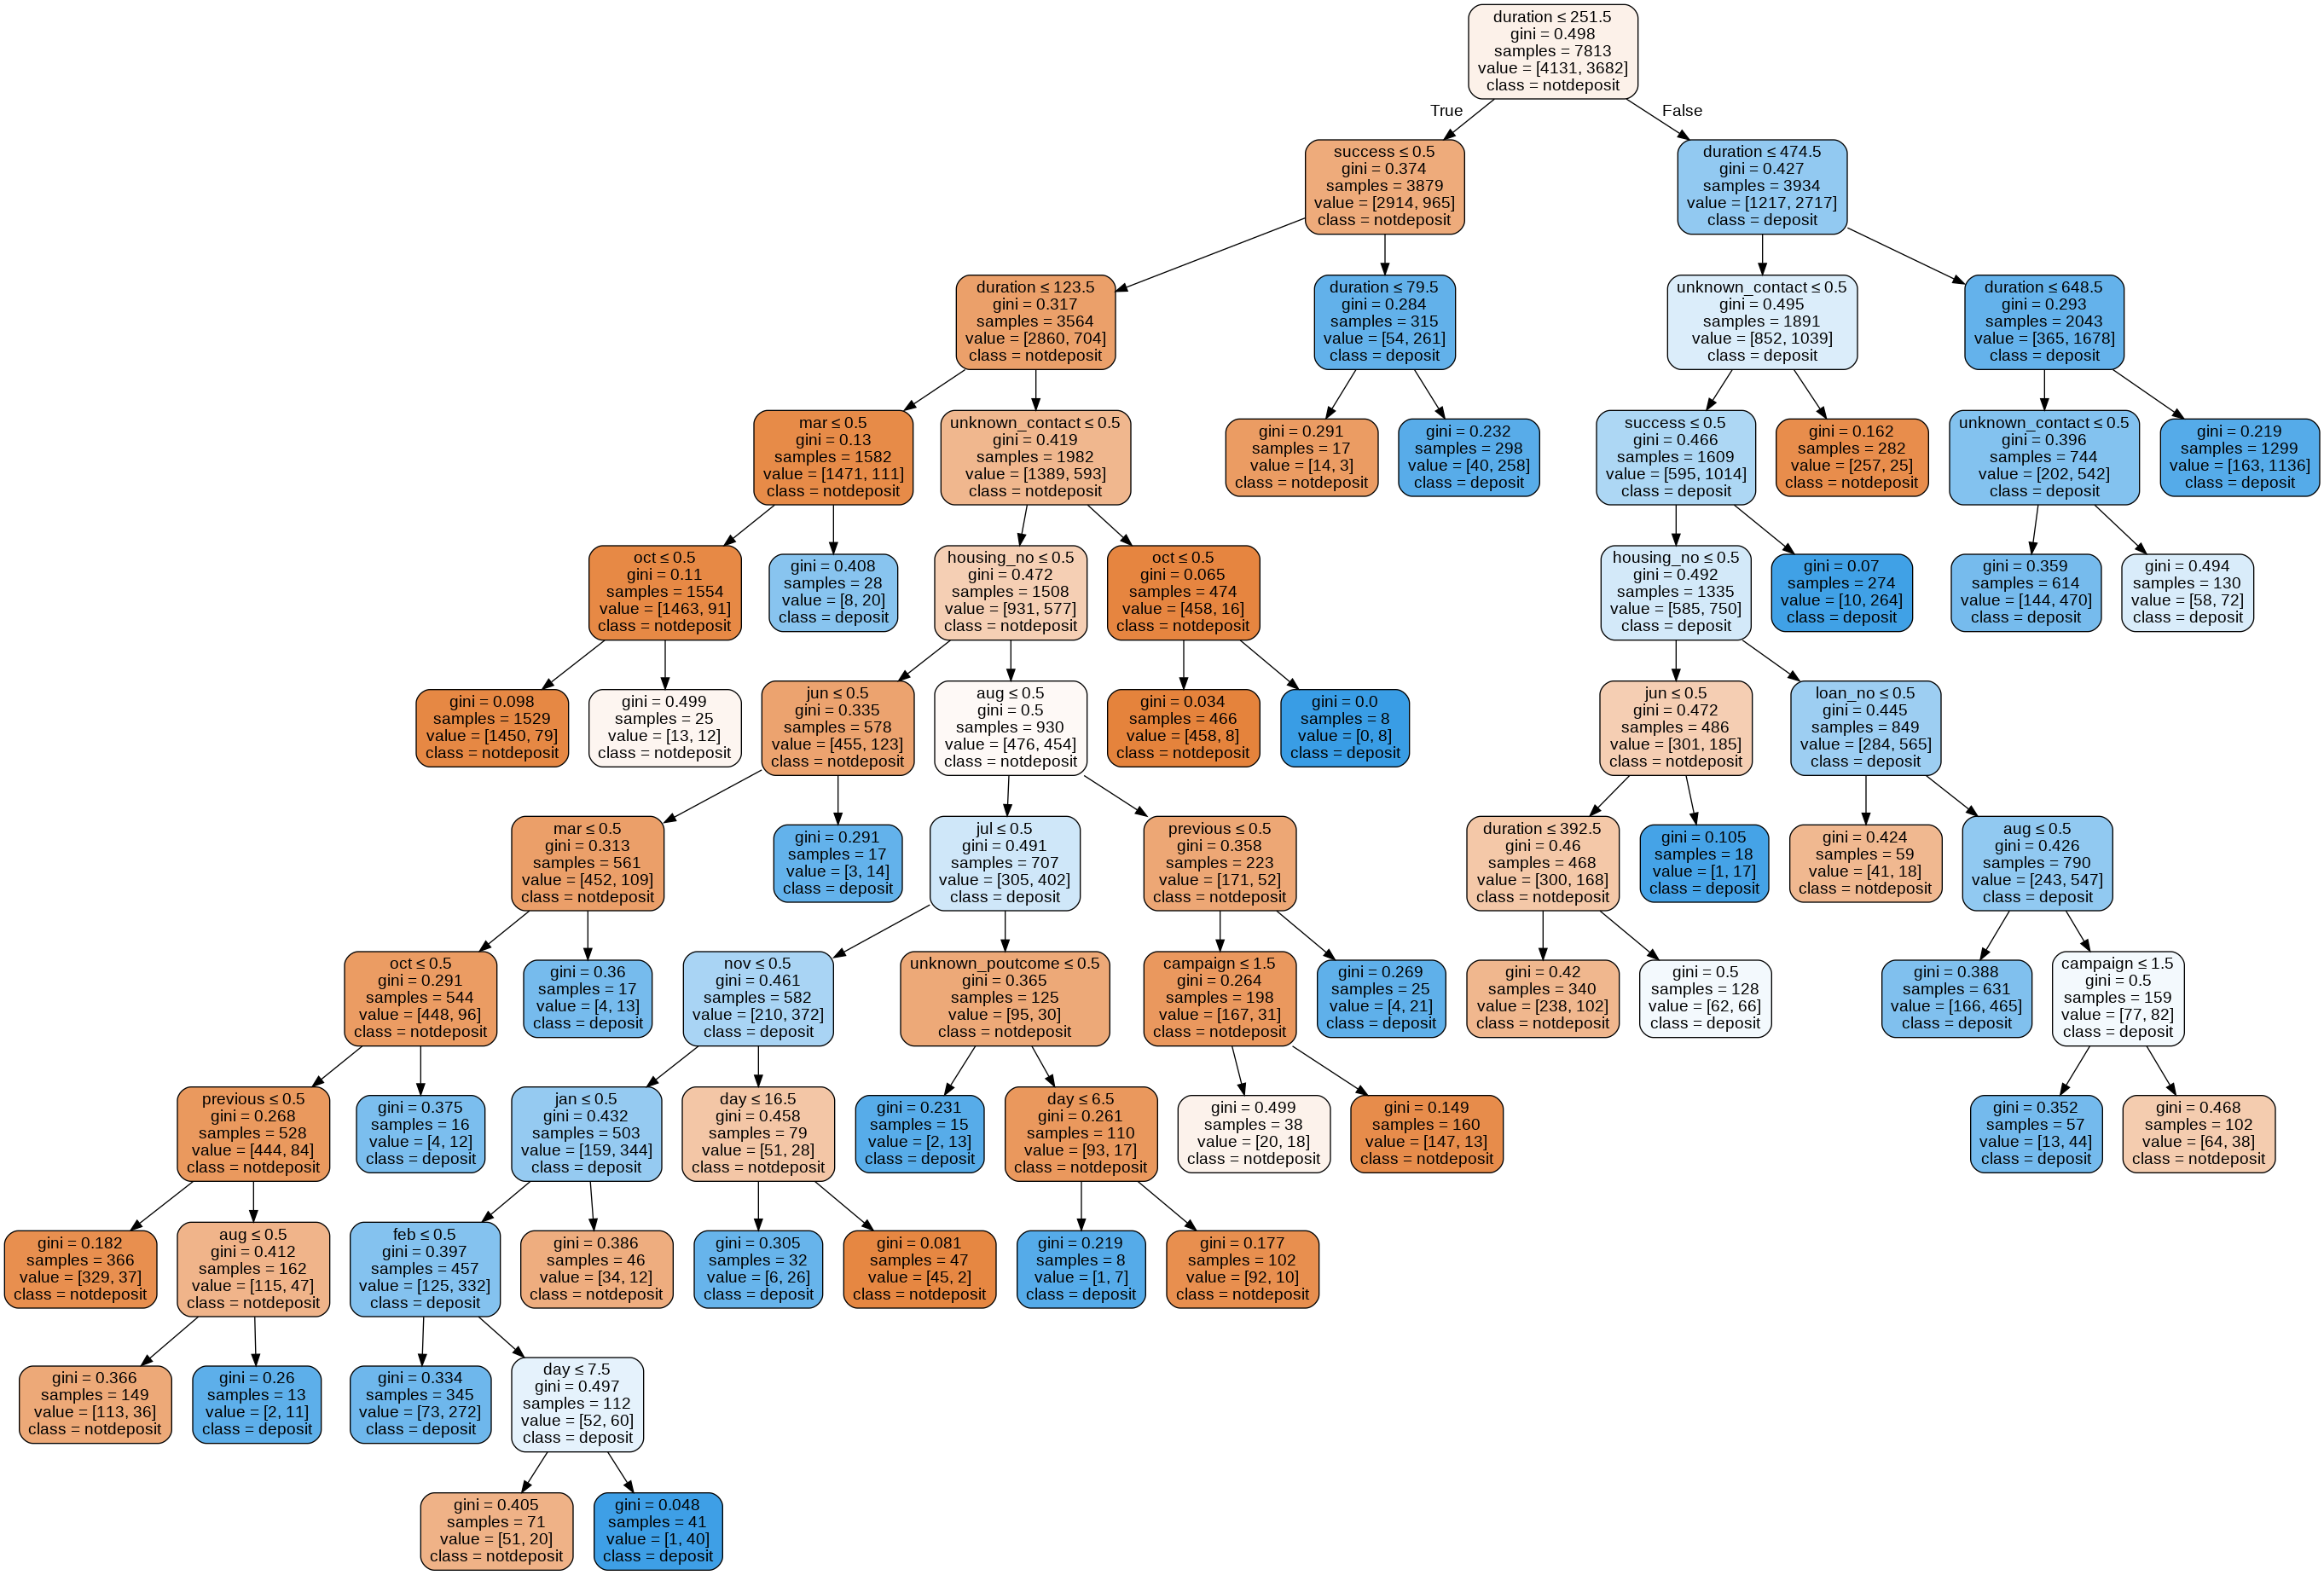

In [58]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notdeposit', 'deposit'],
                feature_names=['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown_job', 'divorced', 'married',
       'single', 'primary', 'secondary', 'tertiary', 'unknown_education',
       'cellular', 'telephone', 'unknown_contact', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'failure',
       'other', 'success', 'unknown_poutcome'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [59]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
print(metrics.confusion_matrix(y_test, y_pred_dtc))
print(metrics.classification_report(y_test, y_pred_dtc))

[[1419  323]
 [ 245 1362]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1742
           1       0.81      0.85      0.83      1607

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [60]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.8303971334726784
Precision: 0.8083086053412463
Recall: 0.8475420037336652
F1 Score: 0.827460510328068
Cohens Kappa Score: 0.6608799857665406


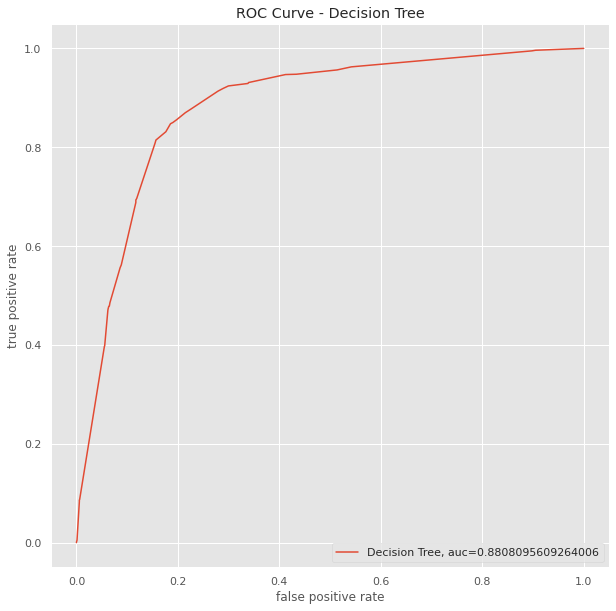

In [61]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Naive Bayes

In [62]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

In [63]:
# Show the Confussion Matrix
print(metrics.confusion_matrix(y_test, y_pred_gnb))
print(metrics.classification_report(y_test, y_pred_gnb))

[[1476  266]
 [ 568 1039]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      1742
           1       0.80      0.65      0.71      1607

    accuracy                           0.75      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.75      0.75      3349



In [64]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7509704389369961
Precision: 0.7961685823754789
Recall: 0.6465463596764157
F1 Score: 0.713598901098901
Cohens Kappa Score: 0.4974708610155635


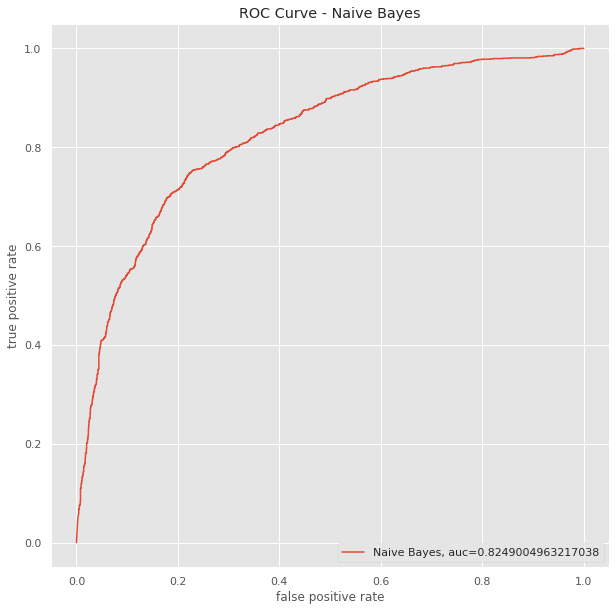

In [65]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Random Forest

In [66]:
# Import Module
from sklearn import ensemble

# Modeling Random Forest
rdf = ensemble.RandomForestClassifier(n_estimators=600)
rdf.fit(X_train, y_train)

# Predict to Test Data 
y_pred_rdf = rdf.predict(X_test)

In [67]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
print(metrics.confusion_matrix(y_test, y_pred_rdf))
print(metrics.classification_report(y_test, y_pred_rdf))

[[1433  309]
 [ 203 1404]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1742
           1       0.82      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [68]:
# Show the Accuracy, Precision, Recall
acc_rdf = metrics.accuracy_score(y_test, y_pred_rdf)
prec_rdf = metrics.precision_score(y_test, y_pred_rdf)
rec_rdf = metrics.recall_score(y_test, y_pred_rdf)
f1_rdf = metrics.f1_score(y_test, y_pred_rdf)
kappa_rdf = metrics.cohen_kappa_score(y_test, y_pred_rdf)

print("Accuracy:", acc_rdf)
print("Precision:", prec_rdf)
print("Recall:", rec_rdf)
print("F1 Score:", f1_rdf)
print("Cohens Kappa Score:", kappa_rdf)

Accuracy: 0.8471185428486115
Precision: 0.819614711033275
Recall: 0.8736776602364654
F1 Score: 0.8457831325301205
Cohens Kappa Score: 0.6945202096952521


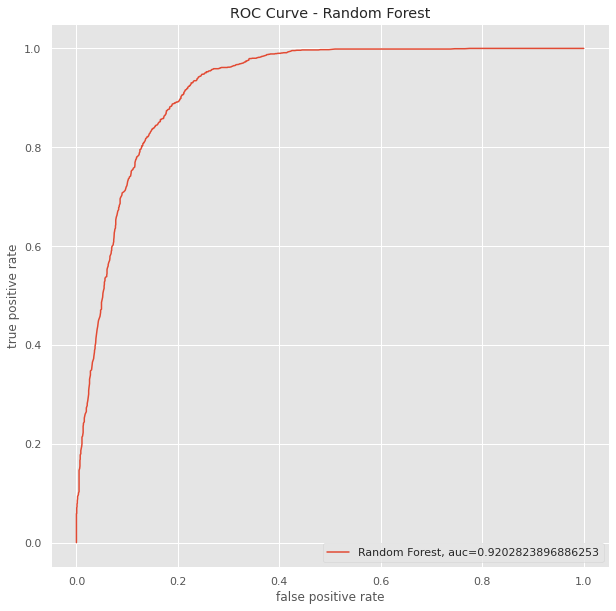

In [69]:
# ROC Curve
y_pred_rdf_proba = rdf.predict_proba(X_test)[::,1]
fprrdf, tprrdf, _ = metrics.roc_curve(y_test,  y_pred_rdf_proba)
aucrdf = metrics.roc_auc_score(y_test, y_pred_rdf_proba)
plt.plot(fprrdf,tprrdf,label="Random Forest, auc="+str(aucrdf))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## Model Comparison

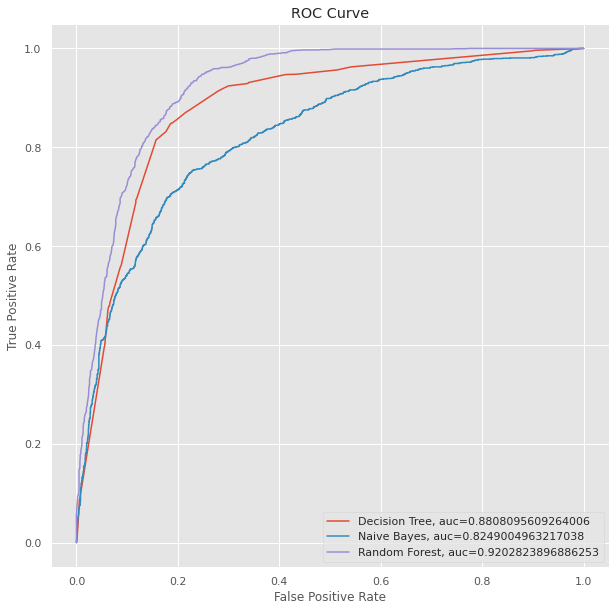

In [70]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprrdf,tprrdf,label="Random Forest, auc="+str(aucrdf))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [71]:
# Comparing Model Confusion Matrix
print('Decision Tree: \n', metrics.confusion_matrix(y_test, y_pred_dtc))
print("_______________________")
print('Naive Bayes: \n', metrics.confusion_matrix(y_test, y_pred_gnb))
print("_______________________")
print('Random Forest: \n', metrics.confusion_matrix(y_test, y_pred_rdf))

Decision Tree: 
 [[1419  323]
 [ 245 1362]]
_______________________
Naive Bayes: 
 [[1476  266]
 [ 568 1039]]
_______________________
Random Forest: 
 [[1433  309]
 [ 203 1404]]


In [72]:
# Comparing Model Classification Report
print('Decision Tree: \n', metrics.classification_report(y_test, y_pred_dtc))
print("_______________________")
print('Naive Bayes: \n', metrics.classification_report(y_test, y_pred_gnb))
print("_______________________")
print('Random Forest: \n', metrics.classification_report(y_test, y_pred_rdf))

Decision Tree: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1742
           1       0.81      0.85      0.83      1607

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

_______________________
Naive Bayes: 
               precision    recall  f1-score   support

           0       0.72      0.85      0.78      1742
           1       0.80      0.65      0.71      1607

    accuracy                           0.75      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.75      0.75      3349

_______________________
Random Forest: 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1742
           1       0.82      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.

In [73]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)
print("_______________________")
print("Random Forest Accuracy =", acc_rdf)
print("Random Forest Precision =", prec_rdf)
print("Random Forest Recall =", rec_rdf)
print("Random Forest F1-Score =", f1_rdf)

Decision Tree Accuracy = 0.8303971334726784
Decision Tree Precision = 0.8083086053412463
Decision Tree Recall = 0.8475420037336652
Decision Tree F1-Score = 0.827460510328068
_______________________
Naive Bayes Accuracy = 0.7509704389369961
Naive Bayes Precision = 0.7961685823754789
Naive Bayes Recall = 0.6465463596764157
Naive Bayes F1-Score = 0.713598901098901
_______________________
Random Forest Accuracy = 0.8471185428486115
Random Forest Precision = 0.819614711033275
Random Forest Recall = 0.8736776602364654
Random Forest F1-Score = 0.8457831325301205


## Conclusion

Berdasarkan hasil perbandingan ketiga model didapat bahwa dengan menggunakan Random Forest memiliki tingkat prediksi yang lebih baik daripada Decision Tree dan Naive Bayes. 

Pada grafik ROC, Random Forest dan Decision Tree memiliki kurva yang hampir serupa, akan tetapi kurva milik Random Forest memperlihatkan bahwa ia lebih baik daripada Decision Tree. 